# Netflex Analysis 

## Introduction

This dataset is about Netflex movies and TV shows. i will analyse it by Exploratory Data Analysis EDA.


# Import Dataset

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


In [35]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
data["date_added"] = pd.to_datetime(data["date_added"].str.strip(), format = "%B %d, %Y")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


# By Years

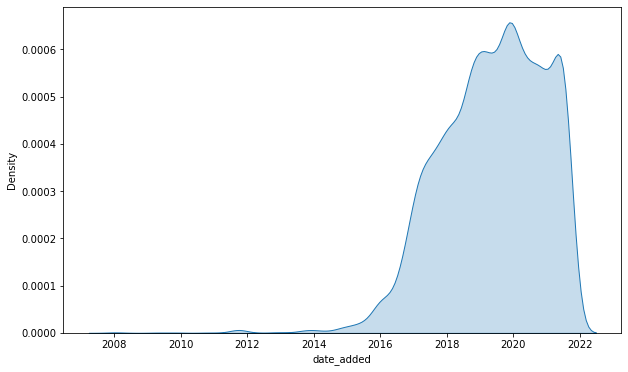

In [39]:
plt.figure(figsize = (10, 6))
sns.kdeplot(data = data["date_added"], shade = True);

In [41]:
plt.figure(figsize = (10, 6))
fig = px.histogram(data, x = data["release_year"])
fig.update_traces(xbins_size=0.5, selector=dict(type='histogram'))
fig.show();

<Figure size 720x432 with 0 Axes>

# By Months

In [42]:
data["date_added_month"] = data["date_added"].dt.month.fillna(0)
data["date_added_month"]

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added_month, Length: 8807, dtype: float64

In [43]:
px.histogram(data, x = data["date_added_month"], color = "date_added_month")

# By Types

In [44]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [45]:
fig = px.histogram(data, x = data["release_year"], color = "type")
fig.update_traces(xbins_size=0.5, selector=dict(type='histogram'))
fig.show();

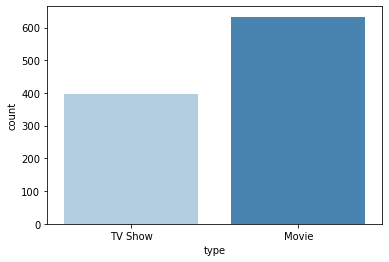

In [48]:
sns.countplot(x="type", data=data[data["release_year"] == 2019], palette = "Blues");

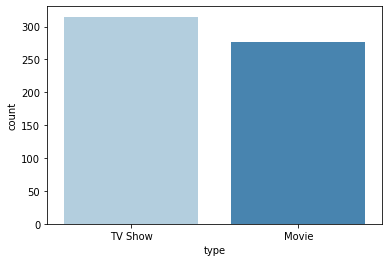

In [49]:
sns.countplot(x="type", data=data[data["release_year"] == 2021], palette = "Blues");


# By Countries

In [30]:
country_df = data[['title','type', 'country' ]]
country_df = (country_df.drop('country', axis=1)
              .join(country_df.country.str.split(', ',expand=True).stack().reset_index(drop=True, level=1).rename('country')))
country_df = country_df[country_df["country"].notna()] 

country_df

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
1,Blood & Water,TV Show,South Africa
4,Kota Factory,TV Show,India
7,Sankofa,Movie,United States
7,Sankofa,Movie,Ghana
...,...,...,...
8801,Zinzana,Movie,Jordan
8802,Zodiac,Movie,United States
8804,Zombieland,Movie,United States
8805,Zoom,Movie,United States


In [31]:
top_ten_countries = country_df.country.value_counts().sort_values(ascending=False)[:10]
top_ten_countries

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

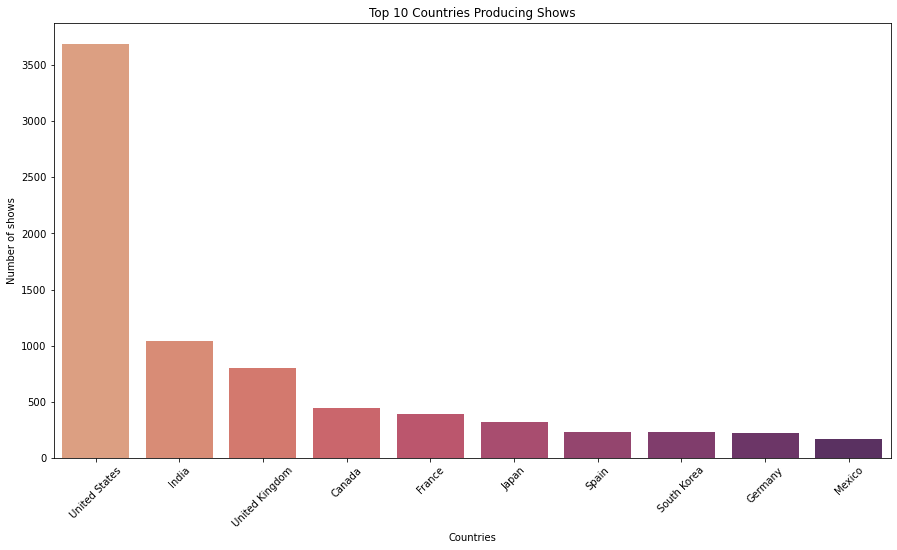

In [33]:
x_countries = top_ten_countries.index
y_countries = top_ten_countries.values
plt.figure(figsize=(15,8))
plt.title("Top 10 Countries Producing Shows")
plt.xlabel("Countries")
plt.ylabel("Number of shows")
plt.xticks(rotation = 45)
sns.barplot(x= x_countries, y = y_countries, palette = 'flare')
plt.show()

### As we can see that the United States, India, and United Kingtom are the top countries.